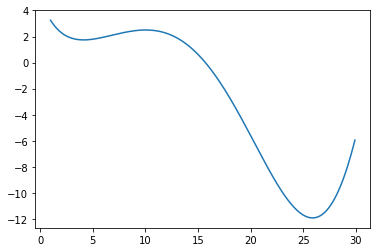

In [114]:
## Задача 1. Минимизация гладкой функции
%matplotlib inline
import numpy as np
import scipy
from matplotlib import pylab as plt
# Рассмотрим все ту же функцию из задания по линейной алгебре:
# f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
# на отрезке  [1, 30]
import math
def f(x):
    xValue = float(x)
    return math.sin(xValue / 5.0) * math.exp(xValue / 10.0) + 5 * math.exp(-xValue / 2.0)
XArray = np.arange(1.0,30.0,0.1)
plt.plot(XArray, [f(v) for v in XArray])
plt.show()

In [55]:
# Найти минимум с  scipy.optimize.minimize
points = [1, 5, 10, 15, 20, 25, 30]
minF0 = [i[0] for i in [scipy.optimize.minimize(f, val).x for val in points]] # Массив, массивов конвертируем в линейный
print minF0

[4.136286974753791, 4.136288322666482, 4.1363002278699295, 24.677661090968858, 25.880187419164756, 25.880185915711404, 25.880193206142593]


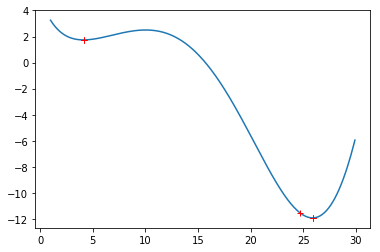

In [56]:
plt.plot(XArray,[f(v) for v in XArray])
for minXVal in minF0:
    plt.plot(minXVal, f(minXVal), 'r+')
plt.show()

[4.136276281772837, 4.136288322666482, 4.1363002278699295, 24.677661090968858, 25.880187419164756, 25.880185915711404, 25.880193206142593]


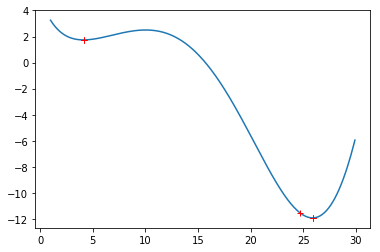

In [59]:
# scipy.optimize.minimize в качестве метода BFGS, с точки 2
points2 = list(points)
points2[0] = 2
minF1 = [i[0] for i in [scipy.optimize.minimize(f, val, method='BFGS').x for val in points2]]
print minF1
plt.plot(XArray,[f(v) for v in XArray])
for minXVal in minF1:
    plt.plot(minXVal, f(minXVal), 'r+')
plt.show()

In [89]:
%time min1 = scipy.optimize.minimize(f, 2, method='BFGS')
%time min2 = scipy.optimize.minimize(f, 30, method='BFGS')
print 'Первый ответ', round(f(min1.x[0]), 2), 'для значения 2 минимум в', min1.x[0], 'Итераций', min1.nit, 'вычислений', min2.nfev
print 'Второй ответ', round(f(min2.x[0]), 2), 'для значения 30 минимум в', min2.x[0], 'Итераций', min2.nit, 'вычислений', min2.nfev

Wall time: 1 ms
Wall time: 1 ms
Первый ответ 1.75 для значения 2 минимум в 4.136276281772837 Итераций 6 вычислений 21
Второй ответ -11.9 для значения 30 минимум в 25.880193206142593 Итераций 6 вычислений 21


In [66]:
## Задача 2: глобальная оптимизация

In [94]:
%time min3 = scipy.optimize.differential_evolution(f, [(1, 30)])
print 'Задание 2. Ответ', round(f(min3.x[0]), 2), '\nминимум в', min3.x[0], '\nИтераций', min3.nit, 'вычислений', min3.nfev

Wall time: 7 ms
Задание 2. Ответ -11.9 
минимум в 25.880196134041658 
Итераций 5 вычислений 96


In [95]:
## Задача 3. Минимизация негладкой функции
# рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30],

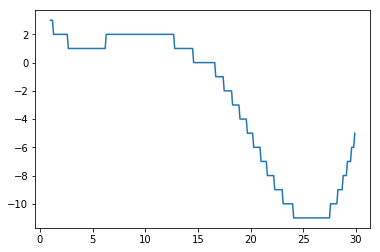

In [115]:
def h(x):
    return int(f(x))

plt.plot(XArray, [h(v) for v in XArray])
plt.show()

In [117]:
%time min4 = scipy.optimize.minimize(h, 30, method='BFGS')
print 'Первый ответ', h(min4.x[0]), 'для значения 30 минимум в', min4.x[0], 'Итераций', min4.nit, 'вычислений', min4.nfev

Wall time: 1e+03 µs
Первый ответ -5 для значения 30 минимум в 30.0 Итераций 0 вычислений 3


In [101]:
%time min5 = scipy.optimize.differential_evolution(h, [(1, 30)])
print 'Второй ответ', h(min5.x[0]), '\nминимум в', min5.x[0], '\nИтераций', min5.nit, 'вычислений', min5.nfev

Wall time: 8 ms
Второй ответ -11 
минимум в 25.895507826568778 
Итераций 5 вычислений 92


In [119]:
# проанализируем метод BFGS на разных значениях функции
minF2 = [h(scipy.optimize.minimize(h, val, method='BFGS').x[0]) for val in points]
print minF2

[3, 1, 2, 0, -5, -11, -5]


In [ ]:
# Нет градиентных спусков - участки параллельных оси x и соответственно в каждой точке производные равны 0 
# и в ней считается минимум